## **Introduction to Image Processing**

## Interpolation and Blending

 Importing necessary libraries/modules and functions

In [15]:
% matplotlib inline
% pprint off


-


Pretty printing has been turned OFF


### ** Resizing an image size using different interpolation functions**

**1. ** Resize the lena or vibot image using nearest, bilinear and bicubic function.

You can define your function which accept the model and resize size from the user or just run a script.

In [16]:
#nearest’, ‘bilinear’, ‘bicubic’
def nearest_scale(im,scale):
    [r,w]=im.shape
    new_r=scale*r
    new_w=scale*w
    new_img = misc.imresize(lena_im, (new_r,new_w),interp='nearest')
    return new_img

def bilinear_scale(im,scale):
    [r,w]=im.shape
    new_r=scale*r
    new_w=scale*w
    new_img = misc.imresize(lena_im, (new_r,new_w),interp='bilinear')
    return new_img
def bicubic_scale(im,scale):
    [r,w]=im.shape
    new_r=scale*r
    new_w=scale*w
    new_img = misc.imresize(lena_im, (new_r,new_w),interp='bicubic')
    return new_img


Size of the input image
(512, 512)
Size of the after nearest interpolation of image, scale=2
(1024, 1024)
Size of the after bilinear interpolation of image, scale=2
(1024, 1024)
Size of the after Bicubic interpolation of image, scale=2
(1024, 1024)


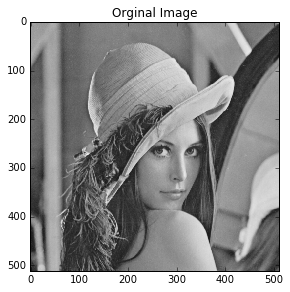

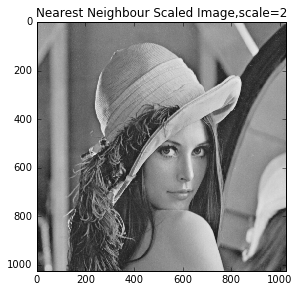

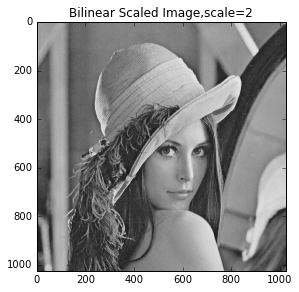

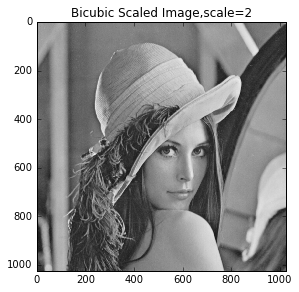

In [17]:
Path = './images/'
lena_im = io.imread(Path.__add__('lena-grey.bmp'))
print("Size of the input image")
print(lena_im.shape)
scale=2;
plt.figure()
io.imshow(lena_im)
plt.title('Orginal Image')
nearest_im=nearest_scale(lena_im,scale)
plt.figure()
io.imshow(nearest_im)
plt.title('Nearest Neighbour Scaled Image,scale=2')
print("Size of the after nearest interpolation of image, scale=2")
print(nearest_im.shape)
#Bilinear Interpolation
bilinear_im=bilinear_scale(lena_im,scale)
plt.figure()
io.imshow(bilinear_im)
plt.title('Bilinear Scaled Image,scale=2')
print("Size of the after bilinear interpolation of image, scale=2")
print(bilinear_im.shape)
#bicubic interpolation
bicubic_im=bicubic_scale(lena_im,scale)
plt.figure()
io.imshow(bicubic_im)
plt.title('Bicubic Scaled Image,scale=2')
print("Size of the after Bicubic interpolation of image, scale=2")
print(bicubic_im.shape)

**2. ** Similar to the function of `my_blending.m` that you saw before define your function of blending.

Blend the lena image and vibot image using simple, alpha and pyramid method.   

Pyramid blending method: 
1. Create a mask the same size as your input images 
2. Create Laplacian pyramid of the input images 
    2.1. Create Gaussian pyramids of the input images
    2.2. Create Laplacian pyramids using the Gaussian pyramids
3. Create Gaussian pyramid for the region mask
4. Blend the two laplacian pyramids using the pyramid of the mask as weigh 
    $$ BL = L_1 * (GM) + L_2 *(1 - GM)$$
5. Colapse the pyramid to get the final image 
    $$rescale(rescale(rescale(BL_3)+BL_2)+BL_1)+BL_0$$

Note : For pyramid blending approach, you can use:
    * transform.rescale for upscaling your images
    * transform.pyramid_gaussian for building your pyramids
    * The output of transform.pyramid_gaussian is a type generator and you need to convert it to a list :
    
        b = [a for a in Gaussian_pyramid]


Use the `orange.jpeg` and `apple.jpeg` imgages and blend them using simple, alpha and pyramid approach.

C:\Users\yemane kahemam\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\yemane kahemam\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\yemane kahemam\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\yemane kahemam\Anaconda3\lib\site-packages\ipykernel\__main__.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\yemane kahemam\Anaconda3\lib\site-packages\ipykernel\__main__.py:42: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\yemane kahemam\Anaconda3\lib\si

NameError: name 'xrange' is not defined

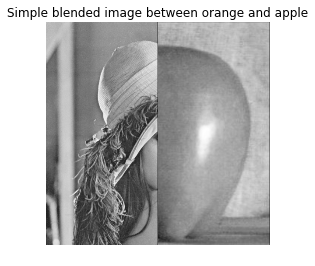

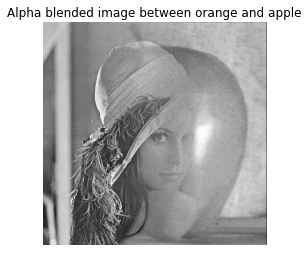

In [21]:

# ---------------------------------------------------------------
# Resize image to be blended: the size of the images to be blended must be equal
def resize_image(im1, im2):
    m_im1, n_im1 = im1.shape
    scaled_img2 = imresize(im2, (m_im1, n_im1), interp='bilinear')
    return scaled_img2

# ---------------------------------------------------------------
# This is a classicalor simple blending
def blend_Simple(im1, im2):
    # Resize image to be blended
    scaled_im2 = resize_image(im1, im2)
    m_im1, n_im1 = im1.shape
    m_im2, n_im2 = scaled_im2.shape

    # Size of blended image
    mBlImage = m_im1
    nBlImage = (n_im1 + n_im2) / 2

    # Take values of Left-half of image 1 and Right-half of Image 2
    simpleBlended_im = np.zeros([mBlImage, nBlImage])
    simpleBlended_im[:, 0:n_im1 / 2 - 1] = im1[:, 0:n_im1 / 2 - 1]
    simpleBlended_im[:, n_im1 / 2:nBlImage - 1] = scaled_im2[:, n_im1 / 2:nBlImage - 1]
    
    # Return simple blended image
    return simpleBlended_im

# ---------------------------------------------------------------
# Alpha blending function
def blend_Alpha(im1, im2):
    # Resize image to be blended
    scaled_im2 = resize_image(im1, im2)
    m_im1, n_im1 = im1.shape
    m_im2, n_im2 = scaled_im2.shape

    simpleBlendedImage=blend_Simple(im1, im2)

    # Get alpha blended image
    w = 200
    im1_Blend = im1[:, n_im1 / 2 - w / 2:n_im1 / 2 + w / 2]
    scaled_im2_Blend = scaled_im2[:, n_im2 / 2 - w / 2: n_im2 / 2 + w / 2]
    alphaBlendedImage = simpleBlendedImage

    for i in range(0, w):
        alpha_orange = -1.0 / w * i + 1
        alpha_apple = 1 - alpha_orange
        alphaBlendedImage[:, n_im1 / 2 - w / 2 + i] = alpha_orange * im1_Blend[:, i] + alpha_apple * scaled_im2_Blend[:, i]

    # Return simple blended image
    return alphaBlendedImage


# ---------------------------------------------------------------
# Pyramid blending function
def blend_Pyramid(im1, im2):
    # Resize image to be power of 2
    scaled_im1 = imresize(im1, (512, 512), interp='bilinear')
    scaled_im2 = imresize(im2, (512, 512), interp='bilinear')

    # generate Gaussian pyramid for A
    G = scaled_im1.copy()
    gpA = [G]
    for i in xrange(6):
        G = cv2.pyrDown(G)
        gpA.append(G)

    # generate Gaussian pyramid for B
    G = scaled_im2.copy()
    gpB = [G]
    for i in range(6):
        G = cv2.pyrDown(G)
        gpB.append(G)

    # generate Laplacian Pyramid for A
    lpA = [gpA[5]]
    for i in xrange(5, 0, -1):
        GE = cv2.pyrUp(gpA[i])
        L = cv2.subtract(gpA[i - 1], GE)
        lpA.append(L)

    # generate Laplacian Pyramid for B
    lpB = [gpB[5]]
    for i in xrange(5, 0, -1):
        GE = cv2.pyrUp(gpB[i])
        L = cv2.subtract(gpB[i - 1], GE)
        lpB.append(L)

    # Now add left and right halves of images in each level
    LS = []
    for la, lb in zip(lpA, lpB):
        rows, cols = la.shape
        ls = np.hstack((la[:, 0:cols / 2], lb[:, cols / 2:]))
        LS.append(ls)

    # now reconstruct
    ls_ = LS[0]
    for i in xrange(1, 6):
        ls_ = cv2.pyrUp(ls_)
        ls_ = cv2.add(ls_, LS[i])

    # image with direct connecting each half
    real = np.hstack((scaled_im1[:, :cols / 2], scaled_im2[:, cols / 2:]))
    return ls_

# ===============================================================
# Blending two images
# ===============================================================
orange_im = color.rgb2gray(io.imread('images/lena-grey.bmp'))
apple_im = color.rgb2gray(io.imread('images/apple.jpeg'))

# Simple blended
simpleBlendedImage=blend_Simple(orange_im,apple_im)
plt.figure()
plt.axis('off')
plt.imshow(simpleBlendedImage, cmap = 'Greys_r')
plt.title('Simple blended image between orange and apple')

# Alpha blended
alphaBlendedImage=blend_Alpha(orange_im,apple_im)
plt.figure()
plt.axis('off')
plt.imshow(alphaBlendedImage, cmap = 'Greys_r')
plt.title('Alpha blended image between orange and apple')

# Pyramid blended
pyramidBlendedImage=blend_Pyramid(orange_im,apple_im)
plt.figure()
plt.axis('off')
plt.imshow(pyramidBlendedImage, cmap = 'Greys_r')
plt.title('Pyramid blended image between orange and apple')

# ===============================================================
# Display results
# ===============================================================
plt.show()

Show the your answers.

In [ ]:
 A = [[2,4], [7,0], [6,3]]
B = [[3,1], [-1,8], [-3, 3]]
c=A+B
c